In [1]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='last.pt')

Using cache found in /home/haider/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-10 torch 1.8.2+cpu CPU

Fusing layers... 
Model Summary: 224 layers, 7094365 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [3]:
img = 'awkwardyears-2.jpg'

In [4]:
result = model(img)
result.print()

image 1/1: 620x620 2 faces
Speed: 37.9ms pre-process, 234.1ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)


In [5]:
def enhance_crop(result):
    for i in range(len(result.pred[0])):
        result.pred[0][i][0] -= 25        
        result.pred[0][i][1] -= 20
        result.pred[0][i][2] += 25
        result.pred[0][i][3] += 20

In [6]:
print(result.xyxy)

[tensor([[251.44167,  63.90418, 381.19049, 248.75024,   0.87556,  15.00000],
        [261.26517, 335.77115, 340.15436, 443.07364,   0.83545,  15.00000]])]


In [7]:
enhance_crop(result)
print(result.xyxy)

[tensor([[226.44167,  43.90418, 406.19049, 268.75024,   0.87556,  15.00000],
        [236.26517, 315.77115, 365.15436, 463.07364,   0.83545,  15.00000]])]


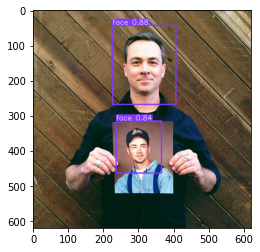

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))

In [12]:
def save_crop(result):
    for i in range(len(result.pred[0])):
        x1 = int(result.pred[0][i][0])
        y1 = int(result.pred[0][i][1])
        x2 = int(result.pred[0][i][2])
        y2 = int(result.pred[0][i][3])
    
        img2 = np.squeeze(result.render())
        crop = img2[y1:y2, x1:x2]
        crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        cv2.imwrite('cropped_images/crop'+str(i)+'.png',crop)

In [13]:
save_crop(result)